In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

file_path = 'WorldHappiness.xls'
data = pd.read_excel(file_path).dropna()

In [77]:
european_countries = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium',
    'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
    'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia',
    'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova',
    'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
    'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia',
    'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
    'United Kingdom', 'Vatican City']

us_data = data[data['Country name'] == 'United States']
european_data = data[data['Country name'].isin(european_countries)]

metrics = ['Life Ladder', 'Log GDP per capita', 'Social support', 
    'Healthy life expectancy at birth', 'Freedom to make life choices', 
    'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

us_means = us_data[metrics].mean()
european_means = european_data[metrics].mean()

comparison_df = pd.DataFrame({'Europe': european_means, 'United States': us_means})
print(comparison_df)

                                     Europe  United States
Life Ladder                        6.216597       6.989396
Log GDP per capita                10.377801      10.982333
Social support                     0.892068       0.912684
Healthy life expectancy at birth  68.660415      66.353749
Freedom to make life choices       0.767302       0.821253
Generosity                        -0.014090       0.181752
Perceptions of corruption          0.698442       0.700090
Positive affect                    0.643059       0.751150
Negative affect                    0.251370       0.266335


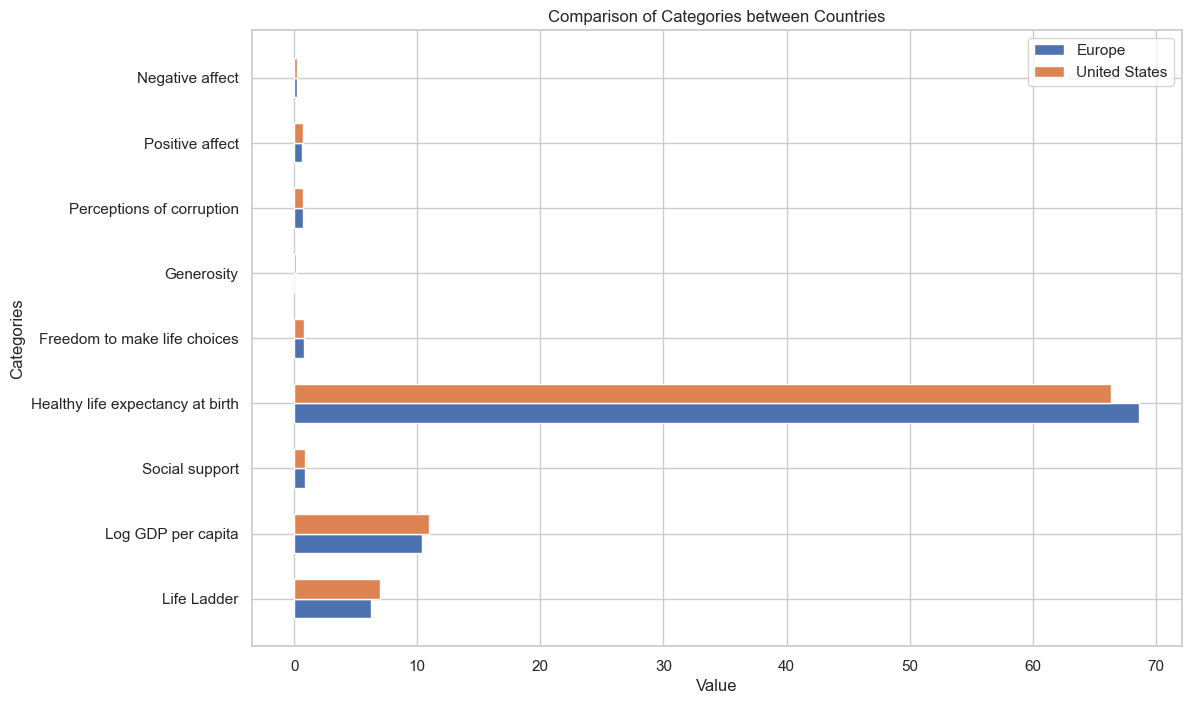

In [78]:
#graph
x = np.arange(len(metrics))
fig, ax = plt.subplots(figsize=(12, 8))
for i, country in enumerate(comparison_df.columns):
    ax.barh(x + i * 0.3, comparison_df[country], height=0.3, label=country)  
ax.set_ylabel('Categories')
ax.set_xlabel('Value')
ax.set_title('Comparison of Categories between Countries')
ax.set_yticks(x + 0.15)
ax.set_yticklabels(metrics)
ax.legend()
plt.show()

- In Europe, people usually get better social support, live longer, and see less corruption. On the other hand, the United States has a stronger economy and more perceived freedom. Overall, people in both regions have similar levels of life satisfaction and emotional well-being.

In [79]:
#US vs Poland vs Norway vs Italy
countries = ['United States', 'Poland', 'Norway', 'Italy']
selected_data = data[data['Country name'].isin(countries)]

metrics = ['Life Ladder', 'Log GDP per capita', 'Social support', 
           'Healthy life expectancy at birth', 'Freedom to make life choices', 
           'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

country_means = selected_data.groupby('Country name')[metrics].mean().reset_index()
c_data = country_means.melt(id_vars='Country name', var_name='Metric', value_name='Value')
print(c_data)

     Country name                            Metric      Value
0           Italy                       Life Ladder   6.258606
1          Norway                       Life Ladder   7.463886
2          Poland                       Life Ladder   6.047258
3   United States                       Life Ladder   6.989396
4           Italy                Log GDP per capita  10.647610
5          Norway                Log GDP per capita  11.074348
6          Poland                Log GDP per capita  10.258427
7   United States                Log GDP per capita  10.982333
8           Italy                    Social support   0.890848
9          Norway                    Social support   0.948437
10         Poland                    Social support   0.909992
11  United States                    Social support   0.912684
12          Italy  Healthy life expectancy at birth  71.547059
13         Norway  Healthy life expectancy at birth  71.030769
14         Poland  Healthy life expectancy at birth  68

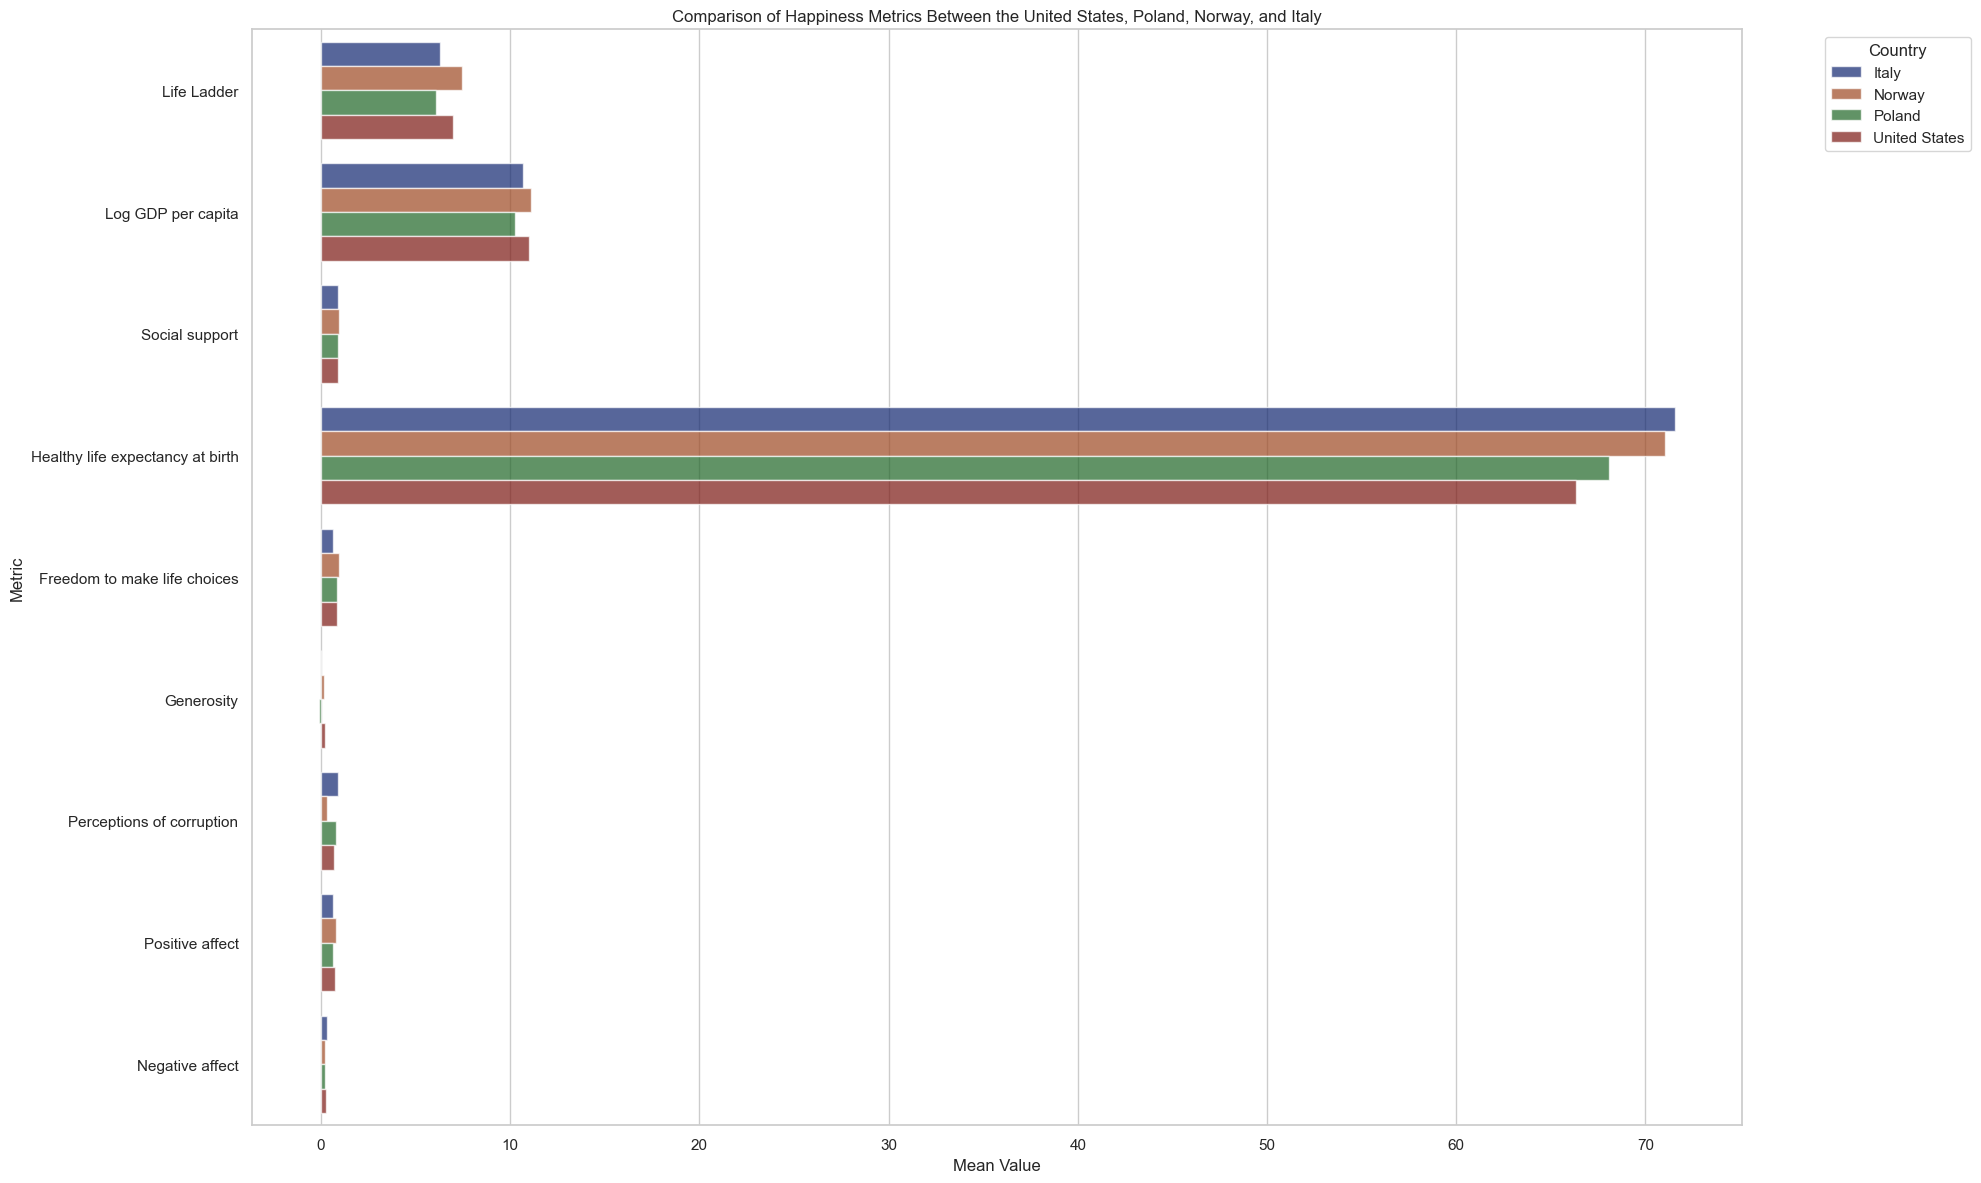

In [80]:
#graph
plt.figure(figsize=(20, 12))
sns.set(style="whitegrid")
ax = sns.barplot(
    data=c_data, y="Metric", x="Value", hue="Country name",
    palette="dark", alpha=.7)
#customization
ax.set_title('Comparison of Happiness Metrics Between the United States, Poland, Norway, and Italy')
ax.set_xlabel('Mean Value')
ax.set_ylabel('Metric')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


- Norway offers high life satisfaction, strong social support, low corruption, and excellent overall well-being.

- Italy has high healthy life expectancy and balanced performance across various indicators, making it an attractive option.

- Poland, while not as strong as Norway or Italy, still provides good social support and a reasonable standard of living, making it a viable option for many.